In [ ]:
import networkx as nx
import numpy as np
import scipy.sparse as sp

In [ ]:
incidence_matrix_o = sp.coo_matrix(([-1],([0],[0])), shape=(9,1)).toarray()
incidence_matrix_b = sp.coo_matrix(([1,1,1,-1,-1,-1],([2,3,4,5,6,7],[0,1,2,0,1,2])), shape=(9,3)).toarray()
incidence_matrix_s = sp.coo_matrix((
    [
        1,
        -1,1,1,1,
        -1,1,
        -1,1,
        -1,
        1,
        -1,1,
        -1,1,
        -1,-1,-1,1
    ],
    (
        # [1,2,2,2,2,3,3,4,4,5,6,7,7,8,8,9,9,9,9],
        # [1,1,2,3,4,2,5,3,6,4,7,5,8,6,9,7,8,9,10]
        [0,1,1,1,1,2,2,3,3,4,5,6,6,7,7,8,8,8,8],
        [0,0,1,2,3,1,4,2,5,3,6,4,7,5,8,6,7,8,9]
    )
    ), shape=(9,10)).toarray()

incidence_matrix_total = np.hstack((incidence_matrix_o, incidence_matrix_b, incidence_matrix_s))
print(incidence_matrix_total)

In [ ]:
fix_matrix = sp.coo_matrix(([1,-1],([0,0],[0,13])),shape=(1,14)).toarray()
fix_incidence_matrix_total = np.vstack((incidence_matrix_total, fix_matrix))
print(fix_incidence_matrix_total)

In [ ]:
# 根据关联矩阵计算邻接矩阵
n = fix_incidence_matrix_total.shape[0]
adj_matrix_new = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        for k in range(fix_incidence_matrix_total.shape[1]):
            if fix_incidence_matrix_total[i, k] == 1 and fix_incidence_matrix_total[j, k] == -1:
                adj_matrix_new[i, j] = 1

print(adj_matrix_new)

In [ ]:
G = nx.DiGraph(adj_matrix_new)
# G.number_of_edges()
# G.number_of_nodes()
nx.draw_networkx(G, with_labels=True, font_weight='bold')

拓展


In [42]:
# 拓展
incidence_matrix_o = sp.coo_matrix(([-1],([0],[0])), shape=(9,1)).toarray()
incidence_matrix_b = sp.coo_matrix(([1,1,1,-1,-1,-1],([2,3,4,5,6,7],[0,1,2,0,1,2])), shape=(9,3)).toarray()
incidence_matrix_s = sp.coo_matrix((
    [
        1,
        -1,1,1,1,
        -1,1,
        -1,1,
        -1,
        1,
        -1,1,
        -1,1,
        -1,-1,-1,1
    ],
    (
        # [1,2,2,2,2,3,3,4,4,5,6,7,7,8,8,9,9,9,9],
        # [1,1,2,3,4,2,5,3,6,4,7,5,8,6,9,7,8,9,10]
        [0,1,1,1,1,2,2,3,3,4,5,6,6,7,7,8,8,8,8],
        [0,0,1,2,3,1,4,2,5,3,6,4,7,5,8,6,7,8,9]
    )
    ), shape=(9,10)).toarray()

incidence_matrix_total = np.hstack((incidence_matrix_o, incidence_matrix_b, incidence_matrix_s, -incidence_matrix_s))
print(incidence_matrix_total)

[[-1  0  0  0  1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1  1  1  1  0  0  0  0  0  0  1 -1 -1 -1  0  0  0  0  0  0]
 [ 0  1  0  0  0 -1  0  0  1  0  0  0  0  0  0  1  0  0 -1  0  0  0  0  0]
 [ 0  0  1  0  0  0 -1  0  0  1  0  0  0  0  0  0  1  0  0 -1  0  0  0  0]
 [ 0  0  0  1  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0 -1  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  1  0  0 -1  0  0]
 [ 0  0  0 -1  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  1  0  0 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1 -1 -1  1  0  0  0  0  0  0  1  1  1 -1]]


In [48]:
fix_matrix = sp.coo_matrix(([1,-1,1],([0,0,0],[0,13,23])),shape=(1,24)).toarray()
fix_incidence_matrix_total = np.vstack((incidence_matrix_total, fix_matrix))
print(fix_incidence_matrix_total)

[[-1  0  0  0  1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1  1  1  1  0  0  0  0  0  0  1 -1 -1 -1  0  0  0  0  0  0]
 [ 0  1  0  0  0 -1  0  0  1  0  0  0  0  0  0  1  0  0 -1  0  0  0  0  0]
 [ 0  0  1  0  0  0 -1  0  0  1  0  0  0  0  0  0  1  0  0 -1  0  0  0  0]
 [ 0  0  0  1  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0 -1  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  1  0  0 -1  0  0]
 [ 0  0  0 -1  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  1  0  0 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1 -1 -1  1  0  0  0  0  0  0  1  1  1 -1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  1]]


In [49]:
# 根据关联矩阵计算邻接矩阵
n = fix_incidence_matrix_total.shape[0]
adj_matrix_new = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        for k in range(fix_incidence_matrix_total.shape[1]):
            if fix_incidence_matrix_total[i, k] == 1 and fix_incidence_matrix_total[j, k] == -1:
                adj_matrix_new[i, j] = 1

print(adj_matrix_new)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [58]:
d = adj_matrix_new-adj_matrix_new.transpose()
additional_weight = np.where(d == 1, incidence_matrix_s.shape[1]-1, 0)
adj_matrix_weight = adj_matrix_new + additional_weight

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0., 10.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0., 10.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.],
       [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

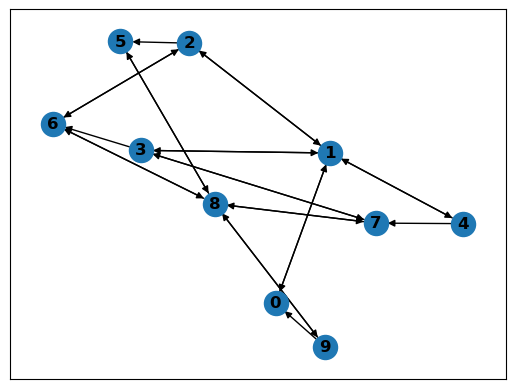

In [59]:
G = nx.DiGraph(adj_matrix_weight)
# G.number_of_edges()
# G.number_of_nodes()
nx.draw_networkx(G, with_labels=True, font_weight='bold')

In [60]:
# 遍历有向图中的所有边，包括它的索引和属性字典等
for edge in G.edges(data=True):
    print(edge)

(0, 1, {'weight': 1.0})
(1, 0, {'weight': 1.0})
(1, 2, {'weight': 1.0})
(1, 3, {'weight': 1.0})
(1, 4, {'weight': 1.0})
(2, 1, {'weight': 1.0})
(2, 5, {'weight': 10.0})
(2, 6, {'weight': 1.0})
(3, 1, {'weight': 1.0})
(3, 6, {'weight': 10.0})
(3, 7, {'weight': 1.0})
(4, 1, {'weight': 1.0})
(4, 7, {'weight': 10.0})
(5, 8, {'weight': 1.0})
(6, 2, {'weight': 1.0})
(6, 8, {'weight': 1.0})
(7, 3, {'weight': 1.0})
(7, 8, {'weight': 1.0})
(8, 5, {'weight': 1.0})
(8, 6, {'weight': 1.0})
(8, 7, {'weight': 1.0})
(8, 9, {'weight': 1.0})
(9, 0, {'weight': 10.0})
(9, 8, {'weight': 1.0})


In [67]:

# 定义起点、终点和经过的边
node_start = 0
node_end = 9
edge_pass = (2, 5)

# 将有向图转换为加权有向图
G_weighted = G.copy()
for u, v, data in G_weighted.edges(data=True):
    if 'weight' in data:
        data['weight'] = int(data['weight'])

    
# 由于给定的边是一条有向边，只要它是在最短路径上，我们就可以确定这条边对应的路径长度
# 首先找到从源节点到边起点的路径，和从边终点到目标节点的路径
path1 = nx.dijkstra_path(G, node_start, edge_pass[0], weight='weight')
path2 = nx.dijkstra_path(G, edge_pass[1], node_end, weight='weight')

print(path2)

# 如果这两条路径都存在，那么就可以沿着其中的路径组合出完整的路径
if path1 is not None and path2 is not None:
    # 将两条路径拼接起来，并判断边是否在路径上
    idx1 = path1.index(edge_pass[0])
    idx2 = path2.index(edge_pass[1])
    # 如果边在路径上，需要合并两条路径并计算路径长度 #TODO
    if idx1 != len(path1) - 1 and idx2 != 0: 
        print("存在一条从节点{}到节点{}并经过边{}的最短路径：{}".format(node_start, node_end, edge_pass, path1[:idx1+1]+path2[idx2:]))
        print("路径长度为：{}".format(nx.dijkstra_path_length(G, node_start, edge_pass[0], weight='weight') + G[edge_pass[0]][edge_pass[1]]['weight'] + nx.dijkstra_path_length(G, edge_pass[1], node_end, weight='weight')))
    else:
        print("节点{}到节点{}不存在经过边{}的最短路径".format(node_start, node_end, edge_pass))
else:
    print("节点{}到节点{}不存在经过边{}的最短路径".format(node_start, node_end, edge_pass))


[5, 8, 9]
节点0到节点9不存在经过边(2, 5)的最短路径
